In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from random import randrange

def readIRISdata():
    iris = load_iris()
    x = iris.data
    t = iris.target
    t = t.reshape((len(t), 1))
    x = np.concatenate((np.ones([x.shape[0], 1]), x), axis=1)

    np.random.seed(150)
    np.random.shuffle(t)
    np.random.seed(150)
    np.random.shuffle(x)

    X_train = x[:80]
    t_train = t[:80]
    X_val   = x[80:120]
    t_val   = t[80:120]
    test_data   = x[120:]
    test_labels   = t[120:]
    return X_train, t_train, X_val, t_val, test_data, test_labels

# read iris dataset
X_train, t_train, X_val, t_val, X_test, t_test = readIRISdata()

In [2]:
# Baseline classifier
new_t_train = np.copy(t_train)
length = t_train.shape[0]
for i in range(length):
  # baseline predict for t = 1, same with t = 0 and t = 2
  if t_train[i][0] == 1:
    new_t_train[i][0] = 1
  else:
    new_t_train[i][0] = 0

output_values = []
for i in range(length):
  output_values.append(new_t_train[i][0])
unique = list(set(output_values))
t_pred = []
for row in t_test:
  index = randrange(len(unique))
  t_pred.append(unique[index])

new_t_test = np.copy(t_test)
length2 = t_test.shape[0]
for i in range(length2):
  if t_test[i][0] == 1:
    new_t_test[i][0] = 1
  else:
    new_t_test[i][0] = 0
test_acc = accuracy_score(new_t_test, t_pred)
print("The baseline test accuracy is ", test_acc)

The baseline test accuracy is  0.6333333333333333


Best hyperparameter is 5
SVM test accuracy is 0.9666666666666667


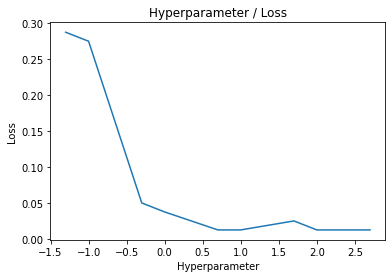

In [3]:
# SVM classifier
t_train = t_train.reshape((len(t_train),))
# Initial hyperparameters, best_hyper
# validation_accuracy, max_accuracy
# mean_squared_errorr, loss
hyperparameters = [0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500]
best_hyper = 0
validation_accuracy = []
max_accuracy = 0
mean_squared_error = []
loss = []

for hyper in hyperparameters:
  svm = SVC(C=hyper)
  # Cross Validation Accuracy
  cvs1 = cross_val_score(svm, X_train, t_train, scoring='accuracy', cv=7)
  current_accuracy = np.mean(cvs1)
  validation_accuracy.append(current_accuracy)
  # Negative Mean Squared Error
  cvs2 = cross_val_score(svm, X_train, t_train, scoring='neg_mean_squared_error', cv=7)
  current_error = np.sqrt(-cvs2)
  mean_squared_error.append(np.mean(current_error))
  # Loss
  svm.fit(X_train, t_train)
  y_pred = svm.predict(X_train)
  current_loss = hamming_loss(t_train, y_pred)
  loss.append(current_loss)
  # Update best_hyper, max_accuracy
  if current_accuracy > max_accuracy:
    best_hyper = hyper
    max_accuracy = current_accuracy

svm = SVC(C=best_hyper)
svm.fit(X_train, t_train)
y_test = svm.predict(X_test)
test_acc = accuracy_score(t_test, y_test)
print('Best hyperparameter is', best_hyper)
print('SVM test accuracy is', test_acc)

# plot Cross Validation Accuracy Curve
plt.plot(np.log10(hyperparameters), validation_accuracy)
plt.xlabel('Hyperparameter')
plt.ylabel('Cross Validation Accuracy')
plt.title('Hyperparameter / Cross Validation Accuracy')
plt.savefig("SVM1.jpg")
plt.cla()
# plot Negative Mean Squared Error Curve
plt.plot(np.log10(hyperparameters), mean_squared_error)
plt.xlabel('Hyperparameter')
plt.ylabel('Negative Mean Squared Error')
plt.title('Hyperparameter / Negative Mean Squared Error')
plt.savefig("SVM2.jpg")
plt.cla()
# Plot Loss Curve
plt.plot(np.log10(hyperparameters), loss)
plt.xlabel('Hyperparameter')
plt.ylabel('Loss')
plt.title('Hyperparameter / Loss')
plt.savefig("SVM3.jpg")

Best hyperparameter is 5
Logistic Regression test accuracy is 0.9666666666666667


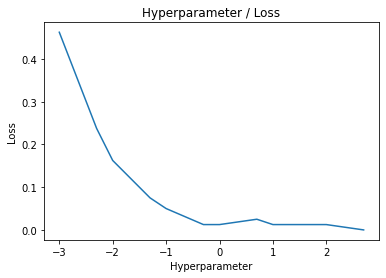

In [4]:
# Logistic Regression Classifier
t_train = t_train.reshape((len(t_train),))
# Initial hyperparameters, best_hyper
# validation_accuracy, max_accuracy
# mean_squared_error, loss
hyperparameters = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500]
best_hyper = 0
validation_accuracy = []
max_accuracy = 0
mean_squared_error = []
loss = []

for hyper in hyperparameters:
  lg = LogisticRegression(C=hyper, max_iter=700)
  # Cross Validation Accuracy
  cvs1 = cross_val_score(lg, X_train, t_train, scoring='accuracy', cv=7)
  current_accuracy = np.mean(cvs1)
  validation_accuracy.append(current_accuracy)
  # Negative Mean Squared Error
  cvs2 = cross_val_score(lg, X_train, t_train, scoring='neg_mean_squared_error', cv=7)
  current_error = np.sqrt(-cvs2)
  mean_squared_error.append(np.mean(current_error))
  # Loss
  lg.fit(X_train, t_train)
  y_pred = lg.predict(X_train)
  current_loss = hamming_loss(t_train, y_pred)
  loss.append(current_loss)
  # Update best_hyper, max_accuracy
  if current_accuracy > max_accuracy:
    best_hyper = hyper
    max_accuracy = current_accuracy

lg = LogisticRegression(C=best_hyper, max_iter=700)
lg.fit(X_train, t_train)
y_test = lg.predict(X_test)
test_acc = accuracy_score(t_test, y_test)
print('Best hyperparameter is', best_hyper)
print('Logistic Regression test accuracy is', test_acc)

# plot Cross Validation Accuracy Curve
plt.plot(np.log10(hyperparameters), validation_accuracy)
plt.xlabel('Hyperparameter')
plt.ylabel('Cross Validation Accuracy')
plt.title('Hyperparameter / Cross Validation Accuracy')
plt.savefig("LogisticRegression1.jpg")
plt.cla()
# plot Negative Mean Squared Error Curve
plt.plot(np.log10(hyperparameters), mean_squared_error)
plt.xlabel('Hyperparameter')
plt.ylabel('Negative Mean Squared Error')
plt.title('Hyperparameter / Negative Mean Squared Error')
plt.savefig("LogisticRegression2.jpg")
plt.cla()
# Plot Loss Curve
plt.plot(np.log10(hyperparameters), loss)
plt.xlabel('Hyperparameter')
plt.ylabel('Loss')
plt.title('Hyperparameter / Loss')
plt.savefig("LogisticRegression3.jpg")

Best hyperparameter is 0.001
Naive Bayes test accuracy is 0.8666666666666667


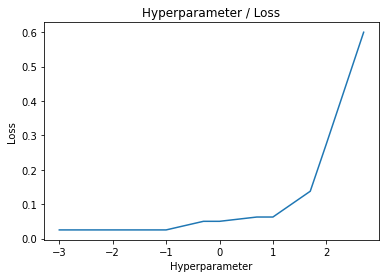

In [5]:
# Naive Bayes classifier
t_train = t_train.reshape((len(t_train),))
# Initial hyperparameters, best_hyper
# validation_accuracy, max_accuracy
# mean_squared_error, loss
hyperparameters = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500]
best_hyper = 0
validation_accuracy = []
max_accuracy = 0
mean_squared_error = []
loss = []

for hyper in hyperparameters:
  nb = CategoricalNB(alpha=hyper)
  # Cross Validation Accuracy
  cvs1 = cross_val_score(nb, X_train, t_train, scoring='accuracy', cv=7)
  current_accuracy = np.mean(cvs1)
  validation_accuracy.append(current_accuracy)
  # Negative Mean Squared Error
  cvs2 = cross_val_score(nb, X_train, t_train, scoring='neg_mean_squared_error', cv=7)
  current_error = np.sqrt(-cvs2)
  mean_squared_error.append(np.mean(current_error))
  # Loss
  nb.fit(X_train, t_train)
  y_pred = nb.predict(X_train)
  current_loss = hamming_loss(t_train, y_pred)
  loss.append(current_loss)

  # Update best_hyper, max_accuracy
  if current_accuracy > max_accuracy:
    best_hyper = hyper
    max_accuracy = current_accuracy

nb = CategoricalNB(alpha=best_hyper)
nb.fit(X_train, t_train)
y_test = nb.predict(X_test)
test_acc = accuracy_score(t_test, y_test)
print('Best hyperparameter is', best_hyper)
print('Naive Bayes test accuracy is', test_acc)

# plot Cross Validation Accuracy Curve
plt.plot(np.log10(hyperparameters), validation_accuracy)
plt.xlabel('Hyperparameter')
plt.ylabel('Cross Validation Accuracy')
plt.title('Hyperparameter / Cross Validation Accuracy')
plt.savefig("Naive_Bayes1.jpg")
plt.cla()
# plot Negative Mean Squared Error Curve
plt.plot(np.log10(hyperparameters), mean_squared_error)
plt.xlabel('Hyperparameter')
plt.ylabel('Negative Mean Squared Error')
plt.title('Hyperparameter / Negative Mean Squared Error')
plt.savefig("Naive_Bayes2.jpg")
plt.cla()
# Plot Loss Curve
plt.plot(np.log10(hyperparameters), loss)
plt.xlabel('Hyperparameter')
plt.ylabel('Loss')
plt.title('Hyperparameter / Loss')
plt.savefig("Naive_Bayes3.jpg")

Best hyperparameter is 5
KNN test accuracy is 0.9666666666666667


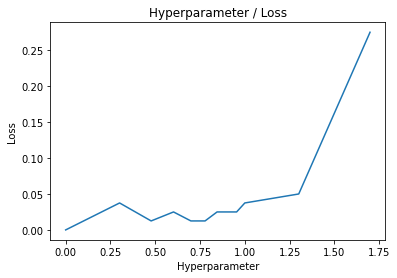

In [6]:
# KNN classifier
t_train = t_train.reshape((len(t_train),))
# Initial hyperparameters, best_hyper
# validation_accuracy, max_accuracy
# mean_squared_error, loss
hyperparameters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50]
best_hyper = 0
validation_accuracy = []
max_accuracy = 0
mean_squared_error = []
loss = []

for hyper in hyperparameters:
  knn = KNeighborsClassifier(n_neighbors=hyper)
  # Cross Validation Accuracy
  cvs1 = cross_val_score(knn, X_train, t_train, scoring='accuracy', cv=7)
  current_accuracy = np.mean(cvs1)
  validation_accuracy.append(current_accuracy)
  # Negative Mean Squared Error
  cvs2 = cross_val_score(knn, X_train, t_train, scoring='neg_mean_squared_error', cv=7)
  current_error = np.sqrt(-cvs2)
  mean_squared_error.append(np.mean(current_error))
  # Loss
  knn.fit(X_train, t_train)
  y_pred = knn.predict(X_train)
  current_loss = hamming_loss(t_train, y_pred)
  loss.append(current_loss)

  # Update best_hyper, max_accuracy
  if current_accuracy > max_accuracy:
    best_hyper = hyper
    max_accuracy = current_accuracy

knn = KNeighborsClassifier(n_neighbors=best_hyper)
knn.fit(X_train, t_train)
y_test = knn.predict(X_test)
test_acc = accuracy_score(t_test, y_test)
print('Best hyperparameter is', best_hyper)
print('KNN test accuracy is', test_acc)

# plot Cross Validation Accuracy Curve
plt.plot(np.log10(hyperparameters), validation_accuracy)
plt.xlabel('Hyperparameter')
plt.ylabel('Cross Validation Accuracy')
plt.title('Hyperparameter / Cross Validation Accuracy')
plt.savefig("KNN1.jpg")
plt.cla()
# plot Negative Mean Squared Error Curve
plt.plot(np.log10(hyperparameters), mean_squared_error)
plt.xlabel('Hyperparameter')
plt.ylabel('Negative Mean Squared Error')
plt.title('Hyperparameter / Negative Mean Squared Error')
plt.savefig("KNN2.jpg")
plt.cla()
# Plot Loss Curve
plt.plot(np.log10(hyperparameters), loss)
plt.xlabel('Hyperparameter')
plt.ylabel('Loss')
plt.title('Hyperparameter / Loss')
plt.savefig("KNN3.jpg")